# Bus speed

## [Download worked project](../../_static/generated/bus-speed-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/bus-speed)

In this little project, we will analyze intercity bus velocities in GTFS format.

Data source: [dati.trentino.it](https://dati.trentino.it/dataset/trasporti-pubblici-del-trentino-formato-gtfs), MITT service, released under [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it) licence.

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
bus-speed-prj
    bus-speed.ipynb
    bus-speed-sol.ipynb
    network.csv
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `bus-speed.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## The dataset

Original GTFS data was split in several files which we merged into dataset [network.csv](network.csv) containing the bus stop times of three extra-urban routes. To load it, we provide this function:

In [1]:
def load_stops():
    "Loads file network.csv and RETURN a list of dictionaries with the stop times"
    
    import csv
    with open('network.csv', newline='', encoding='UTF-8') as csvfile:
        reader = csv.DictReader(csvfile)
        lst = []
        for d in reader:
            lst.append(d)
    return lst

In [2]:
stops = load_stops()

stops[0:2]

[OrderedDict([('', '1'),
              ('route_id', '76'),
              ('agency_id', '12'),
              ('route_short_name', 'B202'),
              ('route_long_name',
               'Trento-Sardagna-Candriai-Vaneze-Vason-Viote'),
              ('route_type', '3'),
              ('service_id', '22018091220190621'),
              ('trip_id', '0002402742018091220190621'),
              ('trip_headsign', 'Trento-Autostaz.'),
              ('direction_id', '0'),
              ('arrival_time', '06:25:00'),
              ('departure_time', '06:25:00'),
              ('stop_id', '844'),
              ('stop_sequence', '2'),
              ('stop_code', '2620'),
              ('stop_name', 'Sardagna'),
              ('stop_desc', ''),
              ('stop_lat', '46.064848'),
              ('stop_lon', '11.09729'),
              ('zone_id', '2620.0')]),
 OrderedDict([('', '2'),
              ('route_id', '76'),
              ('agency_id', '12'),
              ('route_short_name', 'B202'),
  

Of interest to you are the fields `route_short_name`, `arrival_time`, and `stop_lat` and `stop_lon` which provide the geographical coordinates of the stop. Stops are already sorted in the file from earliest to latest.


Given a `route_short_name`, like `B202`, we want to plot the graph of bus velocity measured in **km/hours** at each stop. We define velocity at stop `n` as 

$velocity_n = \frac{\Delta space_n}{\Delta time_n }$


where 

$\Delta time_n = time_n - time_{n-1}$ as the time **in hours**  the bus takes between stop $n$ and stop $n-1$. 

and 

$\Delta space_n = space_n - space_{n-1}$ is the distance the bus has moved between stop $n$ and stop $n-1$.

We also set $velocity_0 = 0$

**NOTE FOR TIME**:  When we say time in **hours**, it means that if you have the time as string `08:27:42`, its number in seconds since midnight is like:


In [3]:
secs = 8*60*60+27*60+42

and to calculate the time in **float hours** you need to divide `secs` by `60*60=3600`: 

In [4]:
hours_float = secs / (60*60)
hours_float

8.461666666666666

**NOTE FOR SPACE**: Unfortunately, we could not find the actual distance as road length done by the bus between one stop and the next one. So, for the sake of the exercise, we will take the _geo distance,_ that is, we will calculate it using the line distance between the points of the stops, using their geographical coordinates. The function to calculate the `geo_distance` is **already implemented** : 

In [5]:
def geo_distance(lat1, lon1, lat2, lon2):
    """ Return the geo distance in kilometers
        between the points 1 and 2 at provided geographical coordinates.
        
    """
    # Shamelessly copied from https://stackoverflow.com/a/19412565
    
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c


In the following we see the bus line `B102`, going from Sardagna to Trento.
The graph should show something like the following.

We can see that as long as the bus is taking stops within Sardagna town, velocity (always intended as air-line velocity ) is high, but when the bus has to go to Trento, since there are many twists and turns on the road, it takes a while to arrive even if in geo-distance Trento is near, so actual velocity decreases. In such case it would be much more convenient to take the cable car.

These type of graphs might show places in the territory where shortcuts such as cable cars, tunnels or bridges might be helpful for transportation.


## to_float_hour

Implement a function `to_float_hour` that takes a time string in the format like `08:27:42` and RETURN the time since midnight in hours as a float (es `8.461666666666666`)

In [6]:
def to_float_hour(time_string):
    #jupman-raise
    hours = int(time_string[0:2])
    mins = int(time_string[3:5])
    secs = int(time_string[6:])
    return (hours * 60 * 60 + mins * 60 + secs) / (60*60)
    #/jupman-raise

## plot

Implement a function `plot` which takes a `route_short_name` and displays with matplotlib a graph of the velocity of  the the bus trip for that route 
        
- just use matplotlib, you **don't** need pandas and **don't** need numpy
- xs positions **MUST** be in **float hours**,  distanced at lengths proportional 
  to the actual time the bus arrives that stop
- xticks **MUST** show:
    - the stop name **NICELY** (with carriage returns)
    - the time in **08:50:12 format** 
- ys **MUST** show the velocity of the bus at that time
- assume velocity at stop `0` equals `0`
- remember to set the figure width and heigth
- remember to set axis labels and title


**Example 1:**

```python
>>> plot('B202')
```

```
xs = [6.416666666666667, 6.433333333333334, 6.45, 6.466666666666667, 6.516666666666667, 6.55, 6.566666666666666, 6.616666666666666, 6.65, 6.683333333333334]
ys = [0, 32.410644806589666, 25.440452145453996, 29.058090168277648, 4.151814096935986, 7.514788081665398, 24.226499833822754, 3.8149164687282586, 34.89698602693173, 14.321244382769315]
xticks = ['Sardagna\n06:25:00', 'Sardagna\nCiv.\n22\n06:26:00', 'Sardagna\nCiv.20\n06:27:00', 'Sardagna\nMaso\nScala\n06:28:00', 'Trento\nLoc.\nS.Antonio\n06:31:00', 'Trento\nVia\nSardagna\nCiv.\n104\n06:33:00', 'Trento\nMaso\nPedrotti\n06:34:00', 'Trento\nLoc.Conotter\n06:37:00', 'Trento\nVia\nBrescia\n4\n06:39:00', 'Trento\nAutostaz.\n06:41:00']

```

![B202 jiruiu9](expected-B202.png)

**Example 2**:

```python
>>> plot('B201')
```
```
xs = [18.25, 18.283333333333335, 18.333333333333332, 18.533333333333335, 18.75, 19.166666666666668]
ys = [0, 57.11513455659372, 27.731105466934423, 41.63842308087865, 28.5197376150513, 31.49374154105802]
xticks = ['Tione\nAutostazione\n18:15:00', 'Zuclo\nSs237\n"Superm.\nLidl"\n18:17:00', 'Saone\n18:20:00', 'Ponte\nArche\nAutost.\n18:32:00', 'Sarche\nCentro\nComm.\n18:45:00', 'Trento\nAutostaz.\n19:10:00']
```
![B201 ekjeriu9](expected-B201.png)

**Example 3**: 

```python
>>> plot('B301')
```

```
xs = [17.583333333333332, 17.666666666666668, 17.733333333333334, 17.766666666666666, 17.8, 17.833333333333332, 17.883333333333333, 17.9, 17.916666666666668, 17.933333333333334, 17.983333333333334, 18.0, 18.05, 18.066666666666666, 18.083333333333332, 18.1, 18.133333333333333, 18.15, 18.166666666666668, 18.183333333333334, 18.25, 18.266666666666666, 18.3, 18.316666666666666, 18.35, 18.383333333333333, 18.4]
ys = [0, 12.183536596091201, 11.250009180954352, 16.612469697023045, 20.32290877261807, 29.650645502388567, 43.45858933073937, 33.590326783093374, 51.14340770207765, 31.710506116846854, 24.12416002315475, 68.52690370810224, 66.54632979050625, 36.97129817779247, 29.62791050495846, 34.08490909322781, 29.184331044522004, 19.648559840967014, 37.7140096915846, 43.892216115372726, 33.48796397878209, 29.521341752309603, 32.83990219938084, 38.20505182104893, 27.292895333249888, 12.602972475349818, 28.804672730461583]
xticks = ['Trento\nAutostaz.\n17:35:00', 'Trento\nC.So\nTre\nNovembre\n17:40:00', 'Trento\nViale\nVerona\n17:44:00', 'Trento\nS.Bartolameo\n17:46:00', 'Trento\nViale\nVerona\nBig\nCenter\n17:48:00', 'Trento\nMan\n17:50:00', 'Mattarello\nLoc.Ronchi\n17:53:00', 'Mattarello\nVia\nNazionale\n17:54:00', 'Mattarello\n17:55:00', 'Mattarello\nEx\nSt.Vestimenta\n17:56:00', 'Acquaviva\n17:59:00', 'Acquaviva\nPizzeria\n18:00:00', 'Besenello\nPosta\nVecchia\n18:03:00', 'Besenello\nFerm.\nNord\n18:04:00', 'Besenello\n18:05:00', 'Besenello\nFerm.\nSud\n18:06:00', 'Calliano\nSp\n49\n"Cimitero"\n18:08:00', 'Calliano\n18:09:00', 'Calliano\nGrafiche\nManfrini\n18:10:00', 'Castelpietra\n18:11:00', 'Volano\n18:15:00', 'Volano\nVia\nDes\nTor\n18:16:00', 'Ss.12\nS.Ilario/Via\nStroperi\n18:18:00', 'S.Ilario\n18:19:00', 'Rovereto\nV.Le\nTrento\n18:21:00', 'Rovereto\nVia\nBarattieri\n18:23:00', 'Rovereto\nVia\nManzoni\n18:24:00']
```

![B301 i0909wq](expected-B301.png)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

    
def plot(route_short_name):
    #jupman-raise
    stops = load_stops()

    xs = []
    ys = []
    ticks = []
    seq = [d for d in stops if d['route_short_name'] == route_short_name]
    d_prev = seq[0]
    n = 0
    for d in seq:
        xs.append(to_float_hour(d['arrival_time']))
        if n == 0:
            v = 0
        else:
            delta_distance = geo_distance(float(d['stop_lat']), float(d['stop_lon']),
                               float(d_prev['stop_lat']), float(d_prev['stop_lon']))
            delta_time = (to_float_hour(d['arrival_time']) - to_float_hour(d_prev['arrival_time']))            
            v = delta_distance / delta_time
        ys.append(v)
        ticks.append("%s\n%s" % (d['stop_name'].replace(' ','\n').replace('-','\n'), d['arrival_time']))
        d_prev = d
        n += 1

    fig = plt.figure(figsize=(20,12))  # width: 20 inches, height 12 inches
    plt.plot(xs, ys)


    plt.title("%s stops SOLUTION" % route_short_name)
    plt.xlabel('stops')
    plt.ylabel('velocity (Km/h)')

    # FIRST NEEDS A SEQUENCE WITH THE POSITIONS, THEN A SEQUENCE OF SAME LENGTH WITH LABELS
    plt.xticks(xs, ticks)
    print('xs = %s' % xs)
    print('ys = %s' % ys)
    print('xticks = %s' % ticks)
    #jupman-purge
    plt.savefig('expected-%s.png' % route_short_name)
    #/jupman-purge
    plt.show()

    #/jupman-raise

xs = [6.416666666666667, 6.433333333333334, 6.45, 6.466666666666667, 6.516666666666667, 6.55, 6.566666666666666, 6.616666666666666, 6.65, 6.683333333333334]
ys = [0, 32.410644806589666, 25.440452145453996, 29.058090168277648, 4.151814096935986, 7.514788081665398, 24.226499833822754, 3.8149164687282586, 34.89698602693173, 14.321244382769315]
xticks = ['Sardagna\n06:25:00', 'Sardagna\nCiv.\n22\n06:26:00', 'Sardagna\nCiv.20\n06:27:00', 'Sardagna\nMaso\nScala\n06:28:00', 'Trento\nLoc.\nS.Antonio\n06:31:00', 'Trento\nVia\nSardagna\nCiv.\n104\n06:33:00', 'Trento\nMaso\nPedrotti\n06:34:00', 'Trento\nLoc.Conotter\n06:37:00', 'Trento\nVia\nBrescia\n4\n06:39:00', 'Trento\nAutostaz.\n06:41:00']


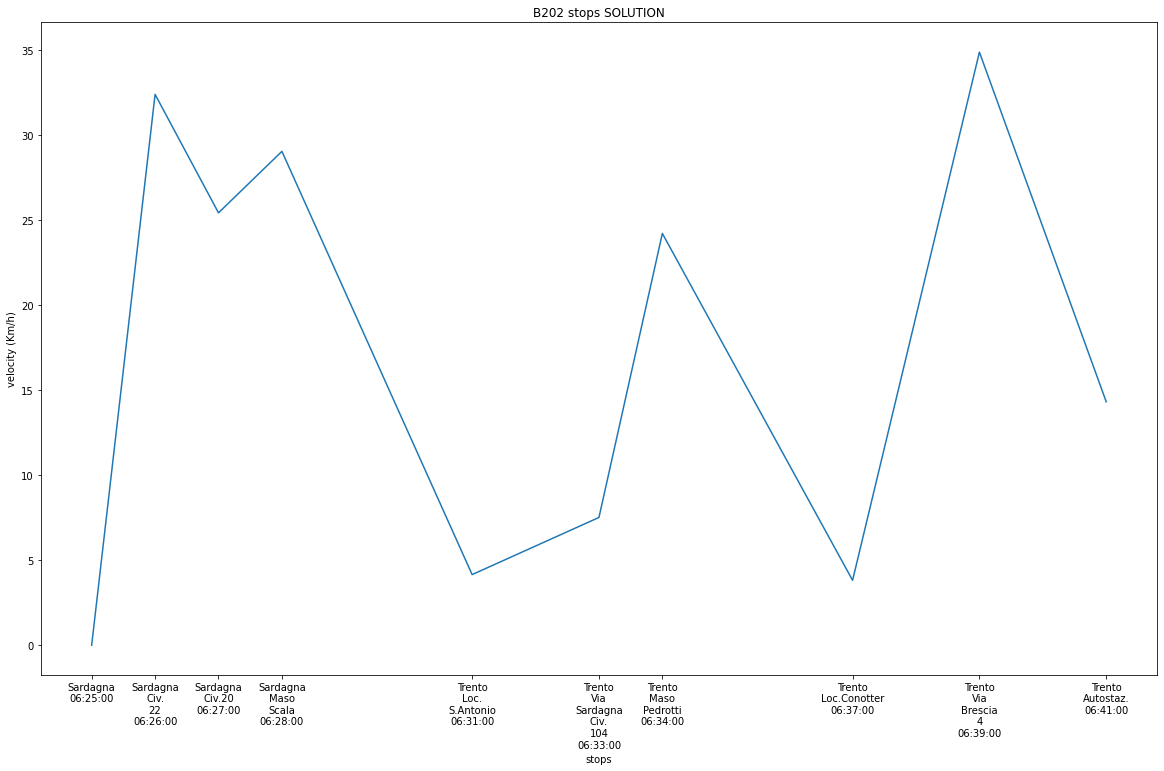

In [8]:
#jupman-purge-output
plot('B202')

xs = [18.25, 18.283333333333335, 18.333333333333332, 18.533333333333335, 18.75, 19.166666666666668]
ys = [0, 57.11513455659372, 27.731105466934423, 41.63842308087865, 28.5197376150513, 31.49374154105802]
xticks = ['Tione\nAutostazione\n18:15:00', 'Zuclo\nSs237\n"Superm.\nLidl"\n18:17:00', 'Saone\n18:20:00', 'Ponte\nArche\nAutost.\n18:32:00', 'Sarche\nCentro\nComm.\n18:45:00', 'Trento\nAutostaz.\n19:10:00']


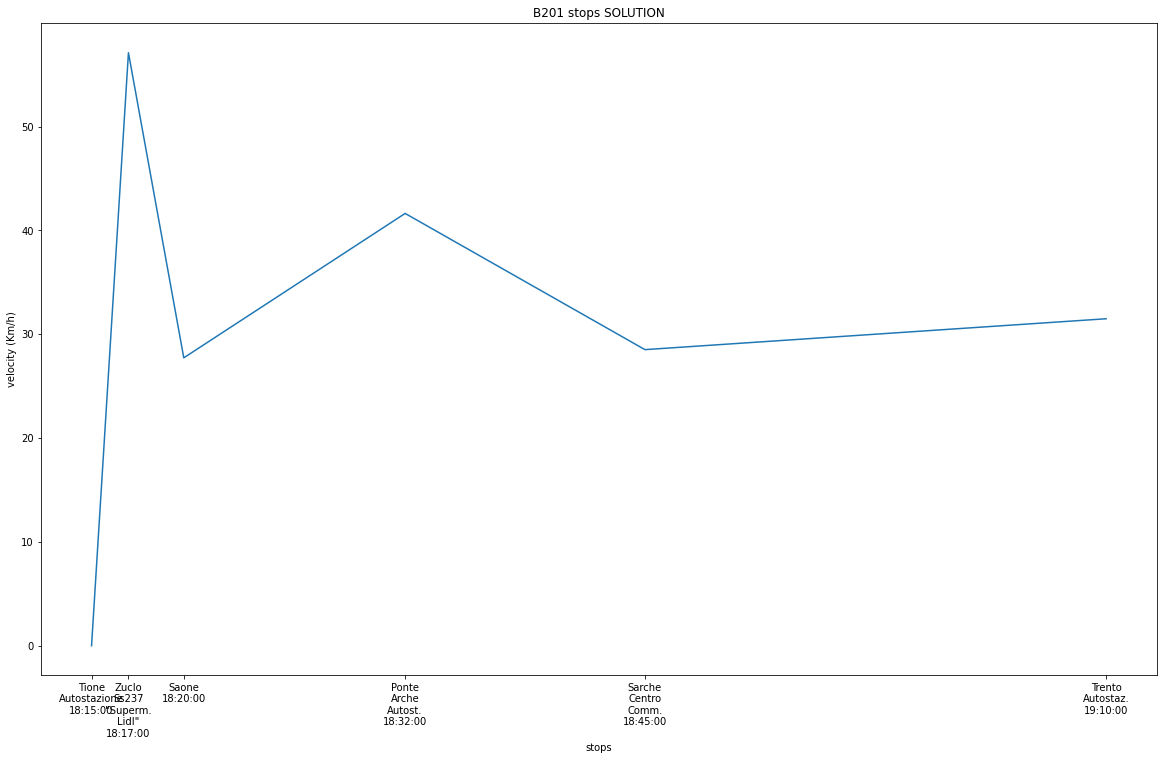

In [9]:
#jupman-purge-output
plot('B201')

xs = [17.583333333333332, 17.666666666666668, 17.733333333333334, 17.766666666666666, 17.8, 17.833333333333332, 17.883333333333333, 17.9, 17.916666666666668, 17.933333333333334, 17.983333333333334, 18.0, 18.05, 18.066666666666666, 18.083333333333332, 18.1, 18.133333333333333, 18.15, 18.166666666666668, 18.183333333333334, 18.25, 18.266666666666666, 18.3, 18.316666666666666, 18.35, 18.383333333333333, 18.4]
ys = [0, 12.183536596091201, 11.250009180954352, 16.612469697023045, 20.32290877261807, 29.650645502388567, 43.45858933073937, 33.590326783093374, 51.14340770207765, 31.710506116846854, 24.12416002315475, 68.52690370810224, 66.54632979050625, 36.97129817779247, 29.62791050495846, 34.08490909322781, 29.184331044522004, 19.648559840967014, 37.7140096915846, 43.892216115372726, 33.48796397878209, 29.521341752309603, 32.83990219938084, 38.20505182104893, 27.292895333249888, 12.602972475349818, 28.804672730461583]
xticks = ['Trento\nAutostaz.\n17:35:00', 'Trento\nC.So\nTre\nNovembre\n17:4

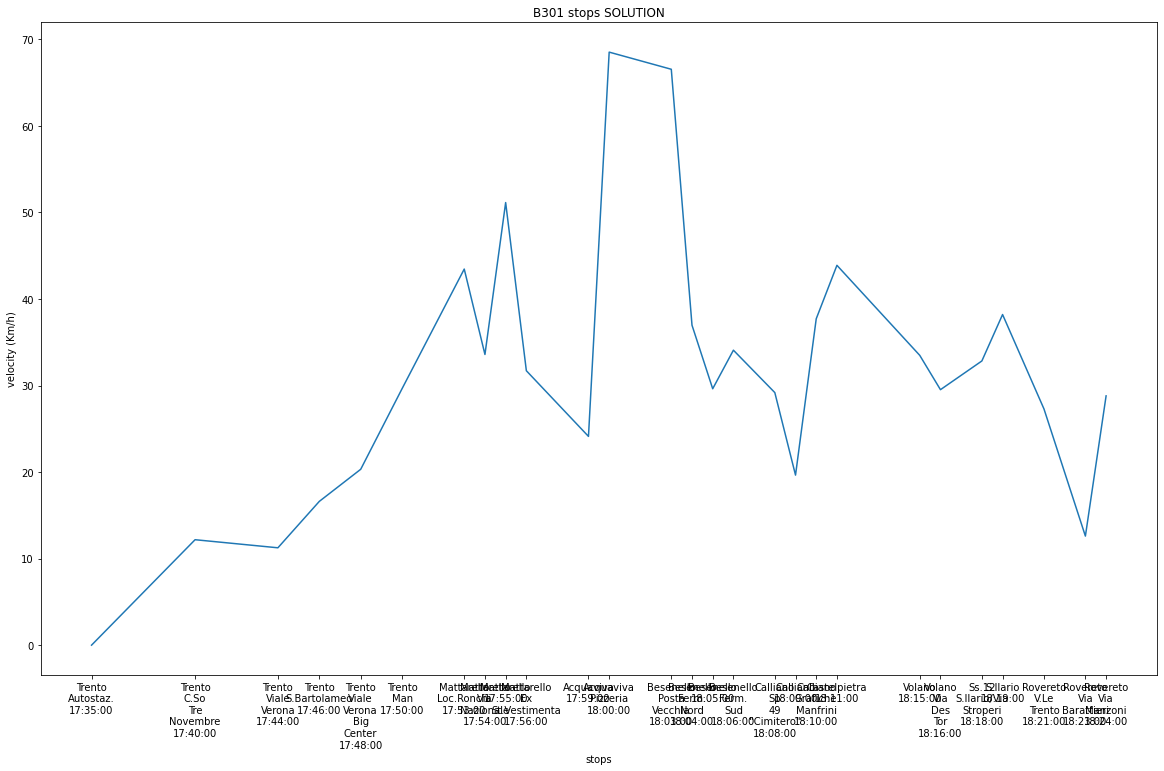

In [10]:
#jupman-purge-output
plot('B301')